In [1]:
import pandas as pd
import vector
import numpy as np
import matplotlib.pyplot as plt  
from bs4 import BeautifulSoup
from particle import Particle
from scipy.optimize import curve_fit
from scipy.stats import chi2, chisquare
from scipy.stats import linregress
from scipy.interpolate import interp1d
import mplhep as hep
from matplotlib.lines import Line2D

from matplotlib.patches import Rectangle


In [2]:

alpha = 1/137.0359   # Constante de estrutura fina
mu = 0.10566  # Massa do múon em GeV
GeV_to_pb = 3.894*1e8
GeV_to_nb = GeV_to_pb*1e-3

M_Z = 91.18  # Massa do bóson Z em GeV
erro_mz = 0.0020

Gamma_Z = 2.4955 # Largura de decaimento total do bóson Z em GeV
erro_gamma_z = 0.0023

Gamma_ee = 0.083984  # Largura de decaimento do Z para ee em GeV
Gamma_mumu = 0.083984  # Largura de decaimento do Z para μμ em GeV

m_e = 0.000511  


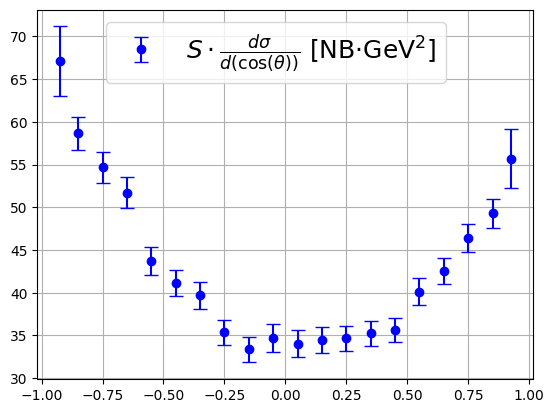

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Dados de COS(THETA) e S*D(SIG)/D(COS(THETA)) [NB*GEV**2]
cos_theta_1 = np.array([-0.925, -0.85, -0.75, -0.65, -0.55, -0.45, -0.35, -0.25, -0.15, -0.05, 
                      0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.925])

# Valores de S*D(SIG)/D(COS(THETA)) [NB*GEV**2]
d_sig_d_cos_1 = np.array([67.08, 58.67, 54.66, 51.72, 43.7, 41.12, 39.71, 35.34, 33.35, 34.69, 
                        34.05, 34.48, 34.66, 35.23, 35.6, 40.13, 42.56, 46.37, 49.28, 55.7])

# Erros associados aos valores de S*D(SIG)/D(COS(THETA)) [NB*GEV**2]
errors_1 = np.array([4.08, 1.94, 1.86, 1.77, 1.64, 1.56, 1.58, 1.51, 1.52, 1.6, 1.59, 
                   1.55, 1.48, 1.46, 1.41, 1.53, 1.53, 1.63, 1.68, 3.42])



# Criando o gráfico com barras de erro
plt.errorbar(cos_theta_1, d_sig_d_cos_1, yerr=errors_1, fmt='o', color='blue', label=r'$S \cdot \frac{d\sigma}{d(\cos(\theta))}$ [NB$\cdot$GeV$^2$]', capsize=5)

# Configurando o gráfico
#plt.xlabel(r'$\cos(\theta)$', fontsize=14)
#plt.ylabel(r'$S \cdot \frac{d\sigma}{d(\cos(\theta))}$ [NB$\cdot$GeV$^2$]', fontsize=14)
#plt.title('Gráfico de $S \cdot \\frac{d\sigma}{d(\cos(\theta))}$ com barras de erro', fontsize=16)
plt.grid(True)

# Movendo a legenda para a esquerda
plt.legend(loc='upper right', fontsize=18, bbox_to_anchor=(0.85, 1))

# Exibindo o gráfico
plt.show()


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Dados fornecidos: COS(THETA) e S*D(SIG)/D(OMEGA) [NB*GEV²] com incertezas
a = np.array([
    -0.89, -0.72, -0.56, -0.4, -0.24, -0.08,  0.08,  0.24,  0.4,  0.56,  0.72,  0.89
])

b = np.array([
    9.17, 8.58, 7.56, 6.56, 5.6, 5.94, 4.86, 5.21, 5.39, 5.8, 6.24, 8.19
])

# Incertezas (erro)
c = np.array([
    1.05, 0.44, 0.38, 0.35, 0.32, 0.34, 0.3, 0.31, 0.31, 0.32, 0.35, 1.0
])



In [5]:
#38.3

d = [
    (-0.8, -0.6),
    (-0.6, -0.4),
    (-0.4, -0.2),
    (-0.2, 0.0),
    (0.0, 0.2),
    (0.2, 0.4),
    (0.4, 0.6),
    (0.6, 0.8),
]

# Valores centrais de cos(theta)
d = [(low + high) / 2 for low, high in d]

# Valores de S * d(sigma)/d(omega) [NB*GEV**2/SR] (sem erros)
e = [8.23, 6.37, 4.94, 4.54, 5.04, 6.25, 6.86, 6.65]

f = [1.85, 1.42, 1.08, 0.88, 1.05, 1.2, 1.43, 1.62]


In [6]:
#43.6GeV
g= [
    (-0.8, -0.6),
    (-0.6, -0.4),
    (-0.4, -0.2),
    (-0.2, 0.0),
    (0.0, 0.2),
    (0.2, 0.4),
    (0.4, 0.6),
    (0.6, 0.8),
]

# Valores centrais de cos(theta)
g = [(low + high) / 2 for low, high in g]

# Valores de S * d(sigma)/d(omega) [NB*GEV**2/SR]
h = [8.45, 8.32, 6.28, 3.71, 4.16, 4.91, 4.83, 5.66]

# Erros estatísticos
i = [0.96, 0.84, 0.64, 0.49, 0.51, 0.55, 0.61, 0.76]


In [7]:
#188.63

j = [
    (-0.8, -0.6),
    (-0.6, -0.4),
    (-0.4, -0.2),
    (-0.2, 0.0),
    (0.0, 0.2),
    (0.2, 0.4),
    (0.4, 0.6),
    (0.6, 0.8),
]

# Valores centrais de cos(theta)
j = [(low + high) / 2 for low, high in j]

# Valores de S * d(sigma)/d(omega) [NB*GEV**2/SR]
k = [8.45, 8.32, 6.28, 3.71, 4.16, 4.91, 4.83, 5.66]
l = [0.21, 0.14, 0.16, 0.14, 0.2, 0.19, 0.24, 0.27]



In [8]:
m = [
    (-0.97, -0.8),
    (-0.8, -0.6),
    (-0.6, -0.4),
    (-0.4, -0.2),
    (-0.2, 0.0),
    (0.0, 0.2),
    (0.2, 0.4),
    (0.4, 0.6),
    (0.6, 0.8),
    (0.8, 0.97),
]

# Valores centrais de cos(theta)
m = [(low + high) / 2 for low, high in m]

# Valores de d(sigma)/d(cos(theta)) [PB]
n = [1.43, 0.54, 0.25, 0.26, 0.56, 0.71, 2.45, 1.45, 1.87, 3.14]

# Erros estatísticos fornecidos
o = [0.48, 0.27, 0.18, 0.19, 0.28, 0.32, 0.58, 0.44, 0.5, 0.71]


In [9]:
p = [-0.625, -0.375, -0.125, 0.125, 0.375, 0.625]
q = [3.16, 2.79, 1.5, 1.21, 1.67, 1.53]

# Erros estatísticos fornecidos
r = [0.68, 0.64, 0.47, 0.41, 0.48, 0.43]


In [10]:
aa = np.array([-0.7, -0.525, -0.35, -0.175, 0.0, 0.175, 0.35, 0.525])

# Valores de D(SIG)/DOMEGA [PB/STR]
bb = np.array([3.21, 2.43, 2.18, 1.8, 1.47, 1.27, 1.41, 1.56])

# Erros associadas aos valores de D(SIG)/DOMEGA [PB/STR]
cc = np.array([0.18, 0.15, 0.14, 0.13, 0.12, 0.1, 0.11, 0.12])


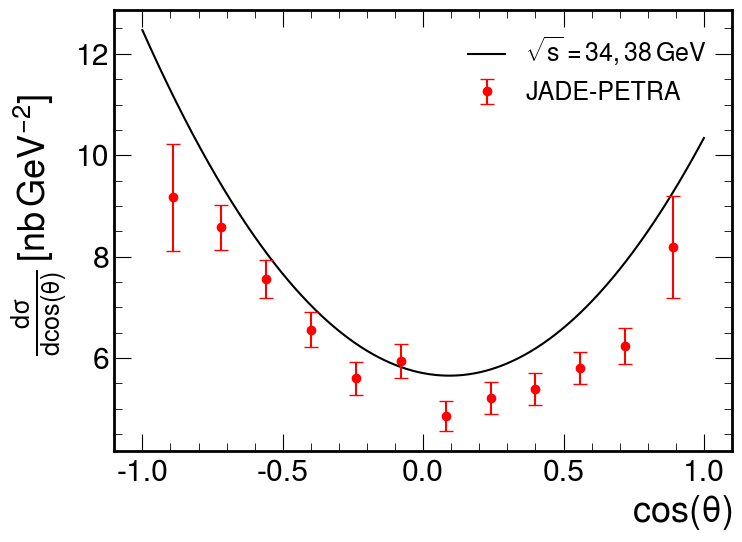

In [40]:
import numpy as np
import matplotlib.pyplot as plt

def diferencial_seccao_transversal(x):
    return ((alpha)**2 /(4*s)) *(1 + x**2 + A*(8/3) * x) * R


cos = np.linspace(-1, 1, 1000)

R = 1.1
s = 34.38 **2 
A= -0.07
resultado = diferencial_seccao_transversal(cos) * GeV_to_nb * s


# Plotar o gráfico
plt.figure(figsize=(8, 6))
hep.style.use('CMS')

plt.plot(cos, resultado, label=r'$\sqrt{s} = 34,38 \, \text{GeV}$', color='black')

#plt.errorbar(aa, bb,cc, fmt='o', color='darkred', label='TOPAZ-KEK', capsize=5)


#plt.errorbar(m, n, o, fmt='o', color='darkblue', label='DELPHI-LEP', capsize=5)

#plt.errorbar(j, k, l, fmt='o', color='darkblue', label='OPAL-LEP', capsize=5)

#plt.errorbar(d, e, f, fmt='o', color='red', label='TASSO-PETRA', capsize=5)

#plt.errorbar(cos_theta_1, d_sig_d_cos_1, yerr=errors_1, fmt='o', color='black', label='SLAC-PEP', capsize=5)
plt.errorbar(a, b, yerr=c, fmt='o', color='red', label='JADE-PETRA', capsize=5)



plt.legend(fontsize=18)
plt.xlabel(r'$\cos(\theta)$', fontsize=26)
plt.ylabel(r'$\ \frac{d\sigma}{d\cos(\theta)} \, [\mathrm{nb} \, \mathrm{GeV}^{-2}]$', fontsize=26, ha = 'center')
plt.tight_layout()
#plt.savefig('JADE_FINAL.png', bbox_inches='tight')



plt.show()
